In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
data,labels=make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


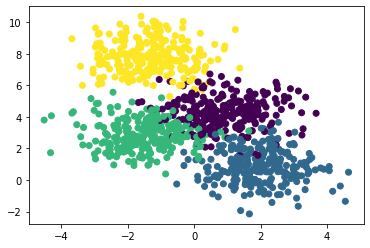

In [3]:
plt.scatter(data[:,0],data[:,1],c=labels)

In [4]:
labels_orig=labels
labels=np.mod(labels_orig,2)

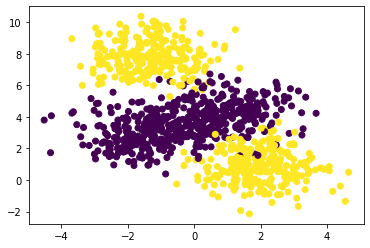

In [5]:
plt.scatter(data[:,0],data[:,1],c=labels)

In [6]:
class SigmoidNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    
    def perceptron(self,x):
        return np.dot(self.w,x)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_b(self,x,y):
        ypred=self.sigmoid(self.perceptron(x))
        return (ypred-y)*ypred*(1-ypred)
    
    def grad_w(self,x,y):
        ypred=self.sigmoid(self.perceptron(x))
        return (ypred-y)*ypred*(1-ypred)*x
    
    def fit(self,X,Y,epochs=1,lr=1,initialise=True):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        
        for i in notebook.tqdm(range(epochs),total=epochs,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            
            self.w=self.w-lr*dw
            self.b=self.b-lr*db
    
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [55]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


In [56]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 2) (250, 2)


In [8]:
sn=SigmoidNeuron()
sn.fit(X_train,Y_train,epochs=1000,lr=0.5)

<ipython-input-6-631102de651e>:10: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-x))


In [9]:
Y_pred_train=sn.predict(X_train)
Y_pred_val=sn.predict(X_val)
Y_pred_binarised_train=np.array([1 if p >= 0.5 else 0 for p in Y_pred_train])
Y_pred_binarised_test=np.array([1 if p >= 0.5 else 0 for p in Y_pred_val])
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_val)
print(accuracy_train,accuracy_test)

0.7253333333333334 0.716


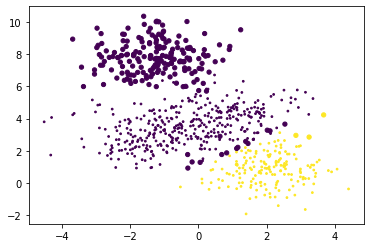

In [10]:
plt.scatter(X_train[:,0],X_train[0:,1],c=Y_pred_binarised_train,s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

## Feed forward network

In [122]:
class FirstFFNetwork:
    def __init__(self):
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.w3=np.random.randn()
        self.w4=np.random.randn()
        self.w5=np.random.randn()
        self.w6=np.random.randn()
        self.b1=0
        self.b2=0
        self.b3=0
        
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def forward_pass(self,x):
        self.x1,self.x2=x
        self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
        self.h1=self.sigmoid(self.a1)
        self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
        self.h2=self.sigmoid(self.a2)
        self.a3=self.w5*self.h1+self.w6*self.h2+self.b3
        self.h3=self.sigmoid(self.a3)
        return self.h3
    
    def grad(self,x,y):
        self.forward_pass(x)
        
        self.dw5=(self.h3-y)*self.h3*(1-self.h3)*self.h1
        self.dw6=(self.h3-y)*self.h3*(1-self.h3)*self.h2
        self.db3=(self.h3-y)*self.h3*(1-self.h3)
        
        self.dw1=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.w1
        self.dw2=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.w2
        self.db1=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)
        
        self.dw3=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x1
        self.dw4=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x2
        self.db2=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)
        
    def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):
        
        if display_loss:
            loss={}
        
        for i in notebook.tqdm(range(epochs),total=epochs,unit="epoch"):
            dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3=[0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1+=self.dw1
                dw2+=self.dw2
                dw3+=self.dw3
                dw4+=self.dw4
                dw5+=self.dw5
                dw6+=self.dw6
                db1+=self.db1
                db2+=self.db2
                db3+=self.db3
                
            m=X.shape[0]
            self.w1-=learning_rate*dw1/m
            self.w2-=learning_rate*dw2/m
            self.w3-=learning_rate*dw3/m
            self.w4-=learning_rate*dw4/m
            self.w5-=learning_rate*dw5/m
            self.w6-=learning_rate*dw6/m
            self.b1-=learning_rate*db1/m
            self.b2-=learning_rate*db2/m
            self.b3-=learning_rate*db3/m
            
            if display_loss:
                Y_pred=self.predict(X)
                loss[i]=mean_squared_error(Y_pred,Y)
            
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Loss')
            plt.show()
        
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    

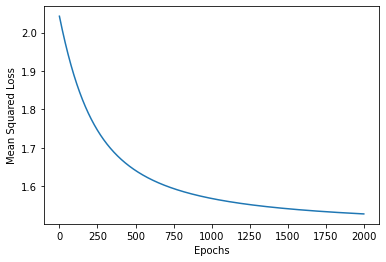

In [123]:
ffn=FirstFFNetwork()
ffn.fit(X_train,Y_train,epochs=2000,learning_rate=0.01,display_loss=True)

In [121]:
Y_pred_train=ffn.predict(X_train)
Y_pred_binarised_train=(Y_pred_train>=0.5).astype("int").ravel()
Y_pred_val=ffn.predict(X_val)
Y_pred_binarised_val=(Y_pred_val>=0.5).astype("int").ravel()
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_val=accuracy_score(Y_pred_binarised_val,Y_val)

print("Training accuracy",accuracy_train)
print("Vaildation accuracy",accuracy_val)

Training accuracy 0.248
Vaildation accuracy 0.256


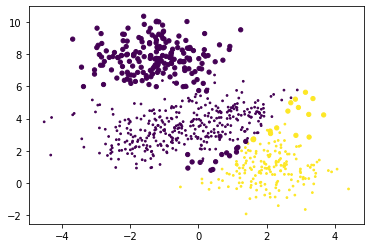

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

# Feed forward network using vectorization

In [96]:
class FF_MultiClass_InputWeightVectorised:
    def __init__(self,W1,W2):
        self.W1=W1.copy()
        self.W2=W2.copy()
        self.B1=np.zeros((1,2))
        self.B2=np.zeros((1,4))
        
    def sigmoid(self,X):
        return 1.0/(1.0+np.exp(-X))
    
    def softmax(self,X):
        exps=np.exp(X)
        return exps/np.sum(exps,axis=1).reshape(-1,1)
    
    def forward_pass(self,X):
        self.A1=np.matmul(X,self.W1)+self.B1
        self.H1=self.sigmoid(self.A1)
        self.A2=np.matmul(self.H1,self.W2)+self.B2
        self.H2=self.softmax(self.A2)
        return self.H2
    
    def grad_sigmoid(self,X):
        return X*(1-X)
    
    def grad(self,X,Y):
        self.forward_pass(X)
        m=X.shape[0]
        
        self.dA2=self.H2-Y
        
        self.dW2=np.matmul(self.H1.T,self.dA2)
        self.dB2=np.sum(self.dA2,axis=0).reshape(1,-1)
        self.dH1=np.matmul(self.dA2,self.W2.T)
        self.dA1=np.multiply(self.dH1,self.grad_sigmoid(self.H1))
        
        self.dW1=np.matmul(X.T,self.dA1)
        self.dB1=np.sum(self.dA1,axis=0).reshape(1,-1)
        
    def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):
        if display_loss:
            loss={}
            
        for i in notebook.tqdm(range(epochs),total=epochs,unit="epoch"):
            self.grad(X,Y)
            
            m=X.shape[0]
            self.W2-=learning_rate*(self.dW2/m)
            self.B2-=learning_rate*(self.dB2/m)
            self.W1-=learning_rate*(self.dW1/m)
            self.B1-=learning_rate*(self.dB1/m)
            
            if display_loss:
                Y_pred=self.predict(X)
                loss[i]=log_loss(np.argmax(Y, axis=1), Y_pred)
                
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    
    def predict(self,X):
        Y_pred=self.forward_pass(X)
        return np.array(Y_pred).squeeze()
    
    

In [97]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)
print(W1)
print(W2)

[[-0.75123712  2.08814141]
 [ 0.36334184 -0.02808955]]
[[ 0.94115473  1.54791904  0.08996587  1.55500706]
 [-1.75586015  0.80115253 -0.81110106 -0.37693806]]


In [98]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels_orig,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


In [99]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


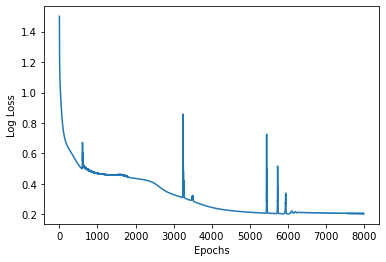

In [114]:
ffn=FF_MultiClass_InputWeightVectorised(W1,W2)
ffn.fit(X_train,y_OH_train,epochs=8000,learning_rate=0.5,display_loss=True)

In [115]:
Y_pred_train=ffn.predict(X_train)
Y_pred_train=np.argmax(Y_pred_train,1)
Y_pred_val=ffn.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)
accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy",accuracy_train)
print("Vaildation accuracy",accuracy_val)

Training accuracy 0.928
Vaildation accuracy 0.936


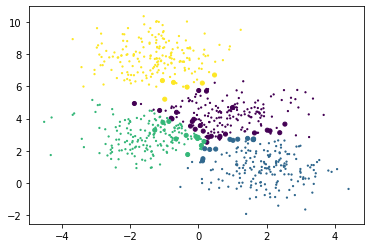

In [116]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()